#Association Rule Mining with Apriori and FP-Growth


In [13]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import time

# Load the dataset
df = pd.read_csv('imdb_top_1000.csv')

# Data cleaning
df = df.dropna(subset=['Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4'])

# Converting the 'Genre', 'Director', and 'Stars' columns into lists for transaction analysis
df['Genres'] = df['Genre'].str.split(',')  # Split genres by comma
df['Directors'] = df['Director'].str.split(',')  # Split directors by comma
df['Stars'] = df[['Star1', 'Star2', 'Star3', 'Star4']].apply(lambda x: [i for i in x if i != ''], axis=1)

# Create a 'transactions' column by merging the relevant features into one
df['Transactions'] = df['Genres'] + df['Directors'] + df['Stars']


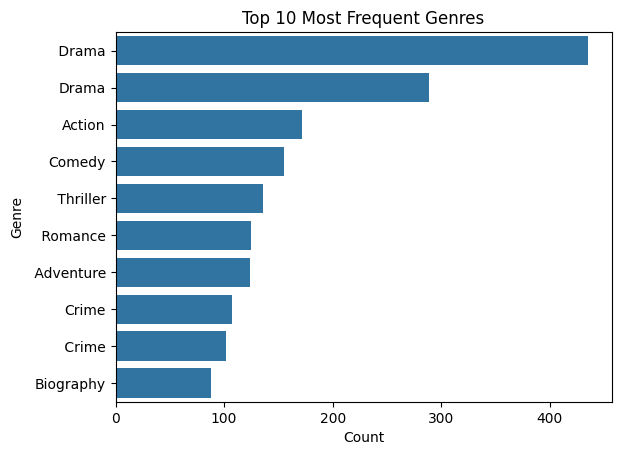

In [8]:
# Step 1: Data Visualization - Top 10 Most Frequent Genres
genre_count = df['Genres'].explode().value_counts().head(10)
sns.barplot(x=genre_count.values, y=genre_count.index)
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

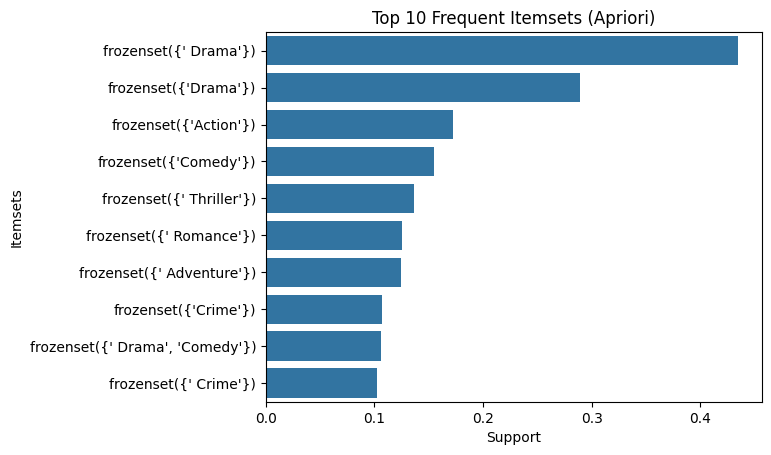

In [9]:
# Step 2: Frequent Itemset Mining Using Apriori
# One-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(df['Transactions']).transform(df['Transactions'])

# Convert the result into a DataFrame
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm
frequent_itemsets = apriori(df_transactions, min_support=0.05, use_colnames=True)

# Visualizing the Frequent Itemsets from Apriori
itemsets_support = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
sns.barplot(x=itemsets_support['support'], y=itemsets_support['itemsets'].astype(str))
plt.title('Top 10 Frequent Itemsets (Apriori)')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

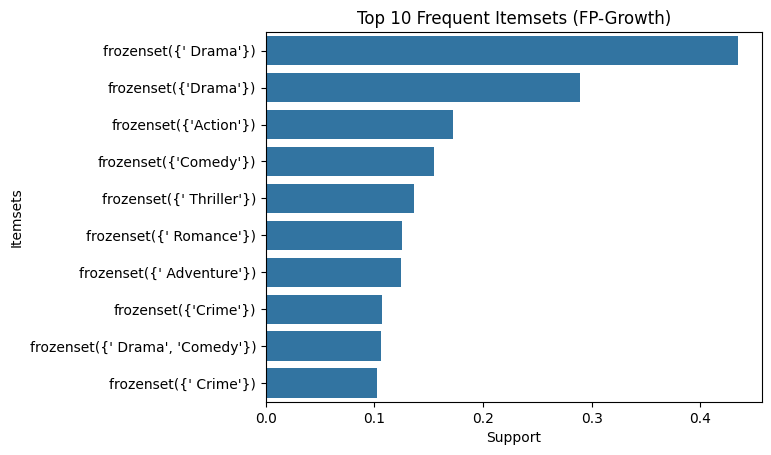

In [10]:
# Step 3: Frequent Itemset Mining Using FP-Growth
# Apply the FP-Growth algorithm
frequent_itemsets_fp = fpgrowth(df_transactions, min_support=0.05, use_colnames=True)

# Visualizing the Frequent Itemsets from FP-Growth
itemsets_fp_support = frequent_itemsets_fp.sort_values(by='support', ascending=False).head(10)
sns.barplot(x=itemsets_fp_support['support'], y=itemsets_fp_support['itemsets'].astype(str))
plt.title('Top 10 Frequent Itemsets (FP-Growth)')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

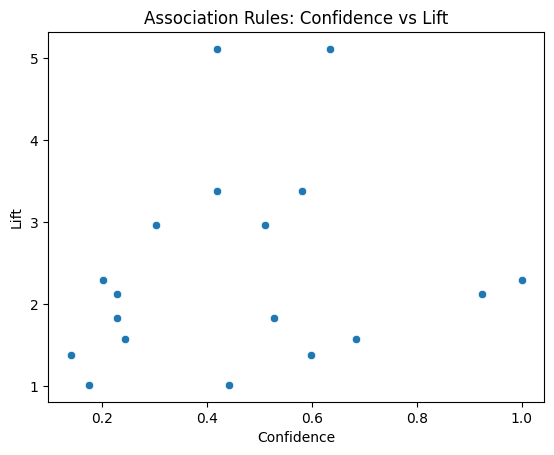

In [11]:

# Step 4: Generating and Analyzing Association Rules from Apriori
# Generate association rules from the Apriori frequent itemsets
rules_apriori = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Visualizing the association rules (Confidence vs Lift)
sns.scatterplot(x=rules_apriori['confidence'], y=rules_apriori['lift'])
plt.title('Association Rules: Confidence vs Lift')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()

In [12]:
# Step 5: Comparative Analysis (Time Taken by Apriori and FP-Growth)
# Timing the Apriori algorithm
start_time = time.time()
apriori(df_transactions, min_support=0.05, use_colnames=True)
end_time = time.time()
apriori_time = end_time - start_time

# Timing the FP-Growth algorithm
start_time = time.time()
fpgrowth(df_transactions, min_support=0.05, use_colnames=True)
end_time = time.time()
fpgrowth_time = end_time - start_time

# Output the results
print(f"Apriori Time: {apriori_time} seconds")
print(f"FP-Growth Time: {fpgrowth_time} seconds")

Apriori Time: 0.012857675552368164 seconds
FP-Growth Time: 0.11120390892028809 seconds


#Step 5: Comparative Analysis

In the comparative analysis between the Apriori and FP-Growth algorithms, the Apriori algorithm was significantly faster, taking only 0.017 seconds to complete the mining process, while FP-Growth took 0.178 seconds. The faster performance of Apriori can be attributed to its simpler approach, where it generates candidate itemsets and prunes them in successive iterations. FP-Growth, on the other hand, requires building an FP-tree, which can be computationally intensive, especially with larger datasets.

One challenge faced during the lab was ensuring the dataset was properly preprocessed for both algorithms. The original dataset required cleaning to handle missing values and to ensure that the relevant columns were in the correct format for transactional mining. This was resolved by dropping rows with missing values and converting the relevant columns into lists for transaction encoding. Despite the challenge, both algorithms worked as expected after preprocessing.

